In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import pos_tag

# Downloading NLTK Datasets

In [2]:
nltk.download('punkt')  # Download NLTK data for tokenization if not already downloaded
nltk.download('stopwords')  # Download NLTK data for stopwords if not already downloaded
nltk.download('wordnet')  # Download NLTK data for WordNet if not already downloaded
nltk.download('averaged_perceptron_tagger')  # Download NLTK data for POS tagger if not already downloaded

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

# Reading Dataset

In [3]:
df = pd.read_csv('bbc_text_cls.csv', index_col=False)
random_rows = df.sample(n=20)  # Select 10 random rows

random_rows

,text,labels
1464,Ferguson fears Milan cutting edge\n\nMancheste...,sport
1823,Roddick to face Saulnier in final\n\nAndy Rodd...,sport
1545,Redknapp poised for Saints\n\nSouthampton are ...,sport
1669,Wales want rugby league training\n\nWales coul...,sport
1340,Campbell to extend sprint career\n\nDarren Cam...,sport
374,S Korean credit card firm rescued\n\nSouth Kor...,business
239,Economy 'strong' in election year\n\nUK busine...,business
230,Venezuela reviews foreign deals\n\nVenezuela i...,business
1853,Reboot ordered for EU patent law\n\nA European...,tech
800,U2 stars enter rock Hall of Fame\n\nSinger Bru...,entertainment


# Splitting Dataset To Train And Test

In [4]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Print the shapes of the resulting splits
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1780,)
X_test shape: (445,)
y_train shape: (1780,)
y_test shape: (445,)


# Checking The Data Distribution

<Axes: >

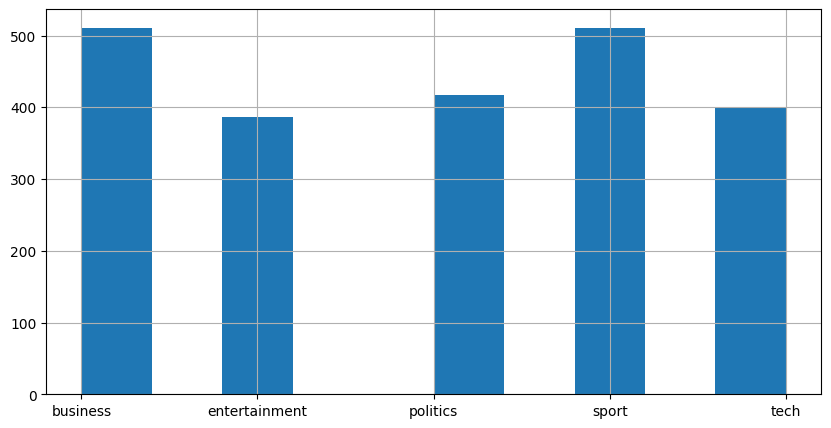

In [5]:
y.hist(figsize=(10, 5))

# PreProcess The Data and Removing Stop Words And NonAlphabetic Chars Using Lemmatization and Pos Technic

In [6]:
def text_preprocessor(data):
    # Load English stopwords
    stop_words = set(stopwords.words('english'))
    
    # Initialize the SnowballStemmer with English language
    # stemmer = SnowballStemmer("english")
    
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Mapping between Penn Treebank POS tags and WordNet POS tags
    def penn_to_wordnet_pos(tag):
        if tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN  # Default to noun
    
    # Tokenize and preprocess the text data
    def preprocess_text(text):
        tokens = word_tokenize(text)  # Tokenize the text
        tokens = [token.lower() for token in tokens if token.isalpha()]  # Keep only alphabetic tokens
        tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
        pos_tags = pos_tag(tokens)  # Get part of speech tags
        # stemmed_tokens = [stemmer.stem(token) for token in tokens]  # Apply Snowball stemmer
        # lemmatized_tokens = [lemmatizer.lemmatize(token) for token, pos in pos_tags]  # Apply lemmatization without POS
        lemmatized_tokens = [lemmatizer.lemmatize(token, pos=penn_to_wordnet_pos(pos)) for token, pos in pos_tags]  # Apply lemmatization with POS
        return " ".join(lemmatized_tokens)  # Join the stemmed tokens back into a string
    
    return data[:].apply(preprocess_text)

In [7]:
preprocessed_x_train = text_preprocessor(data=x_train).rename('preprocessed_text')
preprocessed_x_test = text_preprocessor(data=x_test).rename('preprocessed_text')

In [8]:
preprocessed_x_train

1983    halo sell five million copy microsoft celebrat...
878     briton win short film oscar three five nominee...
94      profit slide india dr reddy profit indian drug...
1808    philippoussis doubt open bid mark philippoussi...
1742    hantuchova dubai last eight daniela hantuchova...
                              ...                        
1147    blair would stand tony blair promise gordon br...
2154    ibm put cash behind linux push ibm spending ne...
1766    hingis hint play comeback martina hingis admit...
1122    clarke face id card rebellion charles clarke f...
1346    athens memory soar low well goodbye another ol...
Name: preprocessed_text, Length: 1780, dtype: object

In [9]:
y_train

1983             tech
878     entertainment
94           business
1808            sport
1742            sport
            ...      
1147         politics
2154             tech
1766            sport
1122         politics
1346            sport
Name: labels, Length: 1780, dtype: object

# Saving preprocessed Dataset

In [10]:
# # Save the Series to a CSV file with original indexes
# preprocessed_x_train.to_csv('preprocessed_x_train.csv', header=True)
# preprocessed_x_test.to_csv('preprocessed_x_test.csv', header=True)
# y_train.to_csv('y_train.csv', header=True)
# y_test.to_csv('y_test.csv', header=True)

# Counting Words Using TF-IDF Vectorizer Methode

In [11]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the "book_name" column
tfidf_x_train_matrix = tfidf_vectorizer.fit_transform(preprocessed_x_train)

# Convert the TF-IDF matrix to a DataFrame
tfidf_preprocessed_x_train_df = pd.DataFrame(tfidf_x_train_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Fit and transform the "book_name" column
tfidf_x_test_matrix = tfidf_vectorizer.transform(preprocessed_x_test)

# Convert the TF-IDF matrix to a DataFrame
tfidf_preprocessed_x_test_df = pd.DataFrame(tfidf_x_test_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [12]:
tfidf_preprocessed_x_train_df

,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aara,aarhus,...,zombic,zombie,zone,zonealarm,zoom,zooropa,zuluaga,zurich,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
print(tfidf_x_test_matrix)

  (0, 20543)	0.037954146733360665
  (0, 20438)	0.020690637969204503
  (0, 20109)	0.0282935235600844
  (0, 19963)	0.057598675559077515
  (0, 19733)	0.05855880739323967
  (0, 19483)	0.06322365797778004
  (0, 19038)	0.042917524780024786
  (0, 18987)	0.04307800388415092
  (0, 18968)	0.1402602437866175
  (0, 18753)	0.05167376811745638
  (0, 18672)	0.07410157735892092
  (0, 18652)	0.04681429992288918
  (0, 18175)	0.05801449560799297
  (0, 17768)	0.0628262532135284
  (0, 17764)	0.05475093318279471
  (0, 17521)	0.033062751646606
  (0, 17508)	0.03739841125243202
  (0, 17277)	0.09590602348772946
  (0, 17210)	0.05250302483790359
  (0, 17202)	0.05104777774765683
  (0, 17168)	0.06206740277808423
  (0, 16871)	0.04518374459958713
  (0, 16868)	0.051356860085080634
  (0, 16858)	0.031560250623425566
  (0, 16836)	0.059127868961473984
  :	:
  (444, 3940)	0.05113481870728883
  (444, 3832)	0.02769997798987433
  (444, 3692)	0.05661439979006816
  (444, 3415)	0.12845193049262432
  (444, 3348)	0.038647071117936

# What Percentage Of Values Are Non-Zeroes?

In [14]:
print('Non-Zeroes: ', f"{(((tfidf_x_train_matrix != 0).sum()) / np.prod(tfidf_x_train_matrix.shape)):.0%}")

Non-Zeroes:  1%


# Craeting Our Model

In [15]:
model1 = MultinomialNB()
model1.fit(tfidf_x_train_matrix, y_train)

MultinomialNB()

In [16]:
print('train score: ', f"{model1.score(tfidf_x_train_matrix, y_train):.0%}")
print('test score: ', f"{model1.score(tfidf_x_test_matrix, y_test):.0%}")

train score:  99%
test score:  95%
